In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
city_df.head()



,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read the City and Ride Data
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()



,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine and display the data into a single dataset (example taken from class activity:"unemploy_chart")
cityride_data_combined = pd.merge(ride_df, city_df, on="city")
cityride_data_combined.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [5]:
cityride_data_combined.shape

(2375, 6)

In [6]:
len(cityride_data_combined["city"].unique())

120

## Bubble Plot of Ride Sharing Data

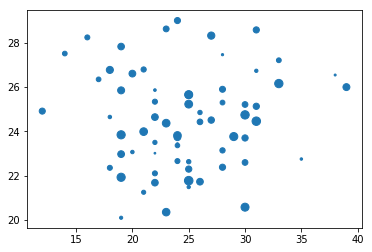

In [7]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

# scatter plot for "urban" city type

total_rides_urban = cityride_data_combined[cityride_data_combined["type"]=="Urban"]

fare_driver_urban = total_rides_urban.groupby("city").mean()

total_rides_urban = total_rides_urban.groupby("city").count()

plt.scatter(total_rides_urban["date"], fare_driver_urban["fare"], s= fare_driver_urban['driver_count'])
plt.show()


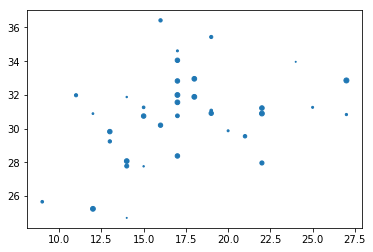

In [8]:
total_rides_suburban = cityride_data_combined[cityride_data_combined["type"]=="Suburban"]

fare_driver_suburban = total_rides_suburban.groupby("city").mean()

total_rides_suburban = total_rides_suburban.groupby("city").count()

plt.scatter(total_rides_suburban["date"], fare_driver_suburban["fare"], s= fare_driver_suburban['driver_count'])
plt.show()

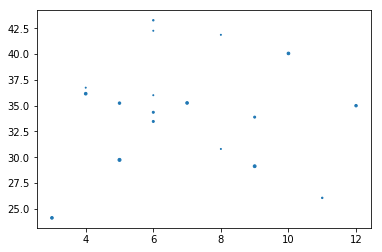

In [9]:
total_rides_rural = cityride_data_combined[cityride_data_combined["type"]=="Rural"]

fare_driver_rural = total_rides_rural.groupby("city").mean()

total_rides_rural = total_rides_rural.groupby("city").count()

plt.scatter(total_rides_rural["date"], fare_driver_rural["fare"], s= fare_driver_rural['driver_count'])
plt.show()

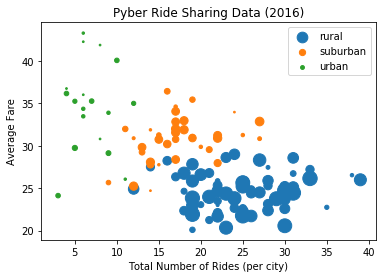

In [10]:
s1 =plt.scatter(total_rides_urban["date"], fare_driver_urban["fare"], s= fare_driver_urban['driver_count']*3,
            label = "Urban")
s2 =plt.scatter(total_rides_suburban["date"], fare_driver_suburban["fare"], s= fare_driver_suburban['driver_count']*3, label = "Suburban")
s3 =plt.scatter(total_rides_rural["date"], fare_driver_rural["fare"], s= fare_driver_rural['driver_count']*3, label ="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare")

plt.legend((s1,s2,s3,),("rural", "suburban", "urban"))
plt.show()

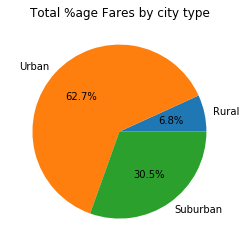

In [11]:
# % of Total Fares by City Type

asd =cityride_data_combined.groupby("type")["fare"].sum()

#cityride_data_combined

total = asd["Rural"]+asd["Suburban"]+asd["Urban"]
plt.pie([asd["Rural"]/total*100,asd["Urban"]/total*100,asd["Suburban"]/total*100 ], autopct = "%1.1f%%", labels = ["Rural","Urban","Suburban"]);
plt.title("Total %age Fares by city type");
plt.show()


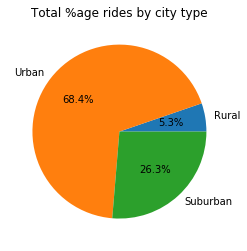

In [12]:
# % of Total Rides by City Type. The function "count" will count the whole row at the time.
asd =cityride_data_combined.groupby("type")["fare"].count()

#cityride_data_combined

total = asd["Rural"]+asd["Suburban"]+asd["Urban"]
plt.pie([asd["Rural"]/total*100,asd["Urban"]/total*100,asd["Suburban"]/total*100 ], autopct = "%1.1f%%", labels = ["Rural","Urban","Suburban"]);

plt.title("Total %age rides by city type");
plt.show()




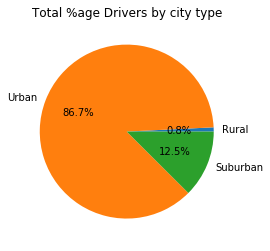

In [13]:
# % of Total Drivers by City Type
tdpc =cityride_data_combined.groupby("type")["driver_count"].sum()

#cityride_data_combined

total = tdpc["Rural"]+tdpc["Suburban"]+tdpc["Urban"]
plt.pie([tdpc["Rural"]/total*100,tdpc["Urban"]/total*100,tdpc["Suburban"]/total*100 ], autopct = "%1.1f%%", labels = ["Rural","Urban","Suburban"]);
plt.title("Total %age Drivers by city type");
plt.show()


## Total Fares by City Type

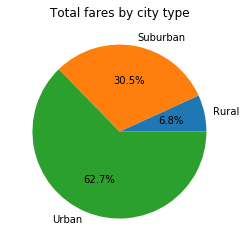

In [47]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

# print(cityride_data_combined.head())
total_fares = cityride_data_combined.groupby('type')[['fare','type']].sum()
# print(total_fares)
labels = total_fares.index.values.tolist()
sizes = total_fares['fare'].values.tolist()
plt.pie(sizes, autopct = "%1.1f%%", labels = labels) 
plt.title("Total fares by city type")
plt.savefig('total_fares.png')
plt.show()


## Total Rides by City Type

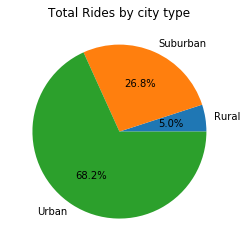

In [48]:
# Calculate Ride Percents
total_ride = cityride_data_combined.groupby('type')[['ride_id','type']].sum()
# print(total_fares)
labels = total_ride.index.values.tolist()
sizes = total_ride['ride_id'].values.tolist()
plt.pie(sizes, autopct = "%1.1f%%", labels = labels) 
plt.title("Total Rides by city type")
plt.savefig('total_ride.png')
plt.show()



In [49]:
# Show Figure
plt.show()

## Total Drivers by City Type

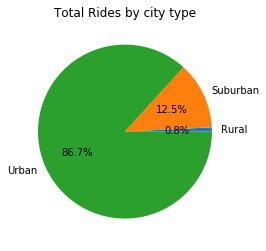

In [50]:
# Calculate Driver Percents
total_drivers = cityride_data_combined.groupby('type')[['driver_count','type']].sum()
# print(total_fares)
labels = total_drivers.index.values.tolist()
sizes = total_drivers['driver_count'].values.tolist()
plt.pie(sizes, autopct = "%1.1f%%", labels = labels) 
plt.title("Total Rides by city type")
plt.savefig('total_drivers.png')
plt.show()
